#데이터셋 불러오기

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [3]:
#데이터 셋 로드
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris.data, iris.target])
#np.c_ : 넘파일 배열을 열 방향으로 연결
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
#표준화
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
scaler_df = scaler.fit_transform(df)
scaler_df = pd.DataFrame(scaler_df)
scaler_df

,0,1,2,3,4
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1.224745
146,0.553333,-1.282963,0.705921,0.922303,1.224745
147,0.795669,-0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


# t-SNE

In [2]:
from sklearn.manifold import TSNE


In [6]:
train = df[['sepal_length', 'sepal_width','petal_length','petal_width']]
train

#2차원 t-SNE
tsne = TSNE(n_components = 2)
tsne

TSNE()

In [7]:
tsne_df = pd.DataFrame(tsne.fit_transform(train), columns=['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,-23.580931,-0.522060
1,-26.291704,-1.093696
2,-26.193335,0.053057
3,-26.638256,-0.321696
4,-23.545013,-0.941377
...,...,...
145,11.363099,-4.289077
146,10.691204,-1.015444
147,11.097084,-3.357184
148,13.195991,-3.724547


In [9]:
# 타겟 추가하고 데이터시각화
import matplotlib.pyplot as plt

tsne_df['target'] = df['target']
tsne_df


,component 0,component 1,target
0,-23.580931,-0.522060,0.0
1,-26.291704,-1.093696,0.0
2,-26.193335,0.053057,0.0
3,-26.638256,-0.321696,0.0
4,-23.545013,-0.941377,0.0
...,...,...,...
145,11.363099,-4.289077,2.0
146,10.691204,-1.015444,2.0
147,11.097084,-3.357184,2.0
148,13.195991,-3.724547,2.0


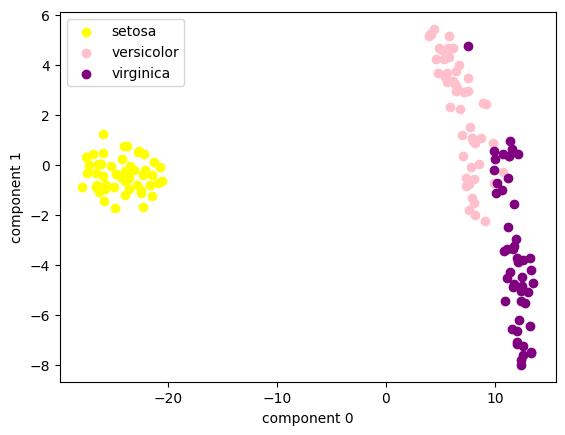

In [10]:
# target별 분리
tsne_0 = tsne_df[tsne_df['target']==0]
tsne_1 = tsne_df[tsne_df['target']==1]
tsne_2 = tsne_df[tsne_df['target']==2]

#target 시각화
plt.scatter(tsne_0['component 0'], tsne_0['component 1'], color = 'yellow', label='setosa')
plt.scatter(tsne_1['component 0'], tsne_1['component 1'], color = 'pink', label='versicolor')
plt.scatter(tsne_2['component 0'], tsne_2['component 1'], color = 'purple', label = 'virginica')
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()